In [147]:
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

import torch.optim as optim

from envs.mdp import StochasticMDPEnv
from agents.hdqn_mdp import hDQN, OptimizerSpec
from hdqn import hdqn_learning
from utils.plotting import plot_episode_stats, plot_visited_states
from utils.schedule import LinearSchedule

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [148]:
NUM_EPISODES = 12000
BATCH_SIZE = 128
GAMMA = 0.99
REPLAY_MEMORY_SIZE = 1000000
LEARNING_RATE = 0.00025

optimizer_spec = OptimizerSpec(
    constructor=optim.Adam,
    kwargs=dict(lr=LEARNING_RATE),
)

exploration_schedule = LinearSchedule(50000, 0.1, 1)

agent = hDQN(
    optimizer_spec=optimizer_spec,
    replay_memory_size=REPLAY_MEMORY_SIZE,
    batch_size=BATCH_SIZE,
)

env = StochasticMDPEnv()

In [149]:
agent, stats, visits = hdqn_learning(
    env=env,
    agent=agent,
    num_episodes=NUM_EPISODES,
    exploration_schedule=exploration_schedule,
    gamma=GAMMA,
)

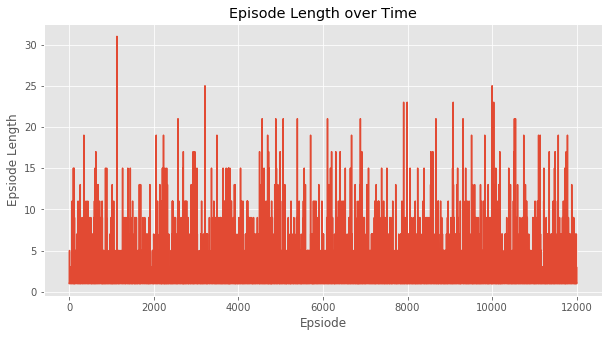

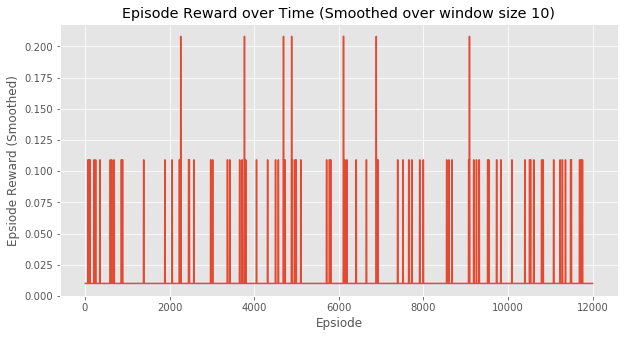

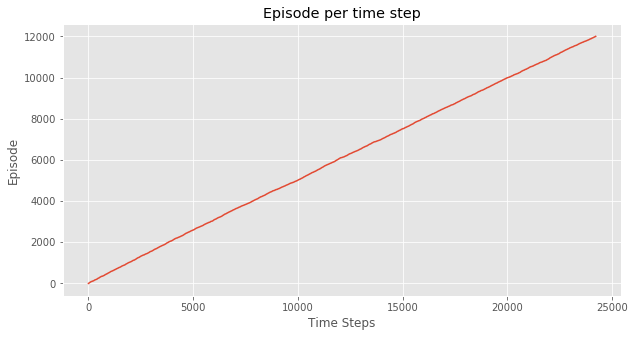

(<matplotlib.figure.Figure at 0x11d97a8d0>,
 <matplotlib.figure.Figure at 0x11d2b9b00>)

In [150]:
plot_episode_stats(stats)

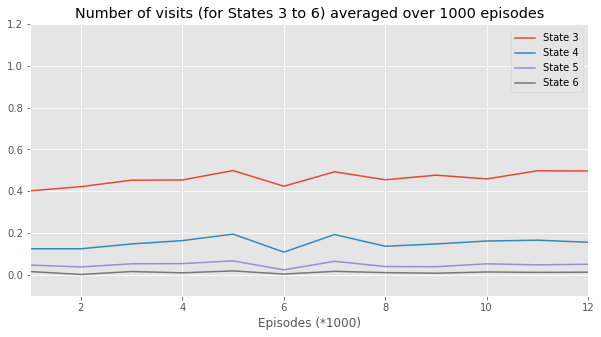

In [151]:
plot_visited_states(visits, NUM_EPISODES)